In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("ECommerce_consumer_behaviour.csv")

In [3]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [4]:
df.shape

(2019501, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [6]:
df_cols_dtype = pd.DataFrame(df.dtypes)
df1_trans = df_cols_dtype.T
df1 = df1_trans.rename(index = {0 : 'Column Type'})

df_cols_nans = pd.DataFrame(df.isnull().sum())
df2_trans = df_cols_nans.T
df2 = df2_trans.rename(index= {0 : 'Missing Values' })

df_col_types_nans = pd.concat([df1, df2])

df_cols_nans_per = pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
df3_trans = df_cols_nans_per.T
df3 = df3_trans.rename(index = {0 : 'Missing vlaues (%)' })

result1 = pd.concat([df_col_types_nans, df3])

In [7]:
result1

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
Column Type,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,object,object
Missing Values,0,0,0,0,0,124342,0,0,0,0,0,0
Missing vlaues (%),0.0,0.0,0.0,0.0,0.0,6.157066,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df['days_since_prior_order'] = df['days_since_prior_order'].fillna('0')

df['days_since_prior_order'] = df['days_since_prior_order'].astype(int)

In [9]:
df_cols_nans = pd.DataFrame(df.isnull().sum())
df2_trans = df_cols_nans.T
df2 = df2_trans.rename(index= {0 : 'Missing Values' })

df_col_types_nans = pd.concat([df1, df2])

df_cols_nans_per = pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
df3_trans = df_cols_nans_per.T
df3 = df3_trans.rename(index = {0 : 'Missing vlaues (%)' })

result2 = pd.concat([df_col_types_nans, df3])

In [10]:
result2

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
Column Type,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,object,object
Missing Values,0,0,0,0,0,0,0,0,0,0,0,0
Missing vlaues (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df.nunique()

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
result = df.groupby('order_dow')['user_id'].agg(['count']).sort_values(by = 'count', ascending = False)

In [14]:
result

,count
order_dow,
0,391831
1,349236
6,280751
5,262157
2,261912
3,238730
4,234884


array([<Axes: ylabel='count'>], dtype=object)

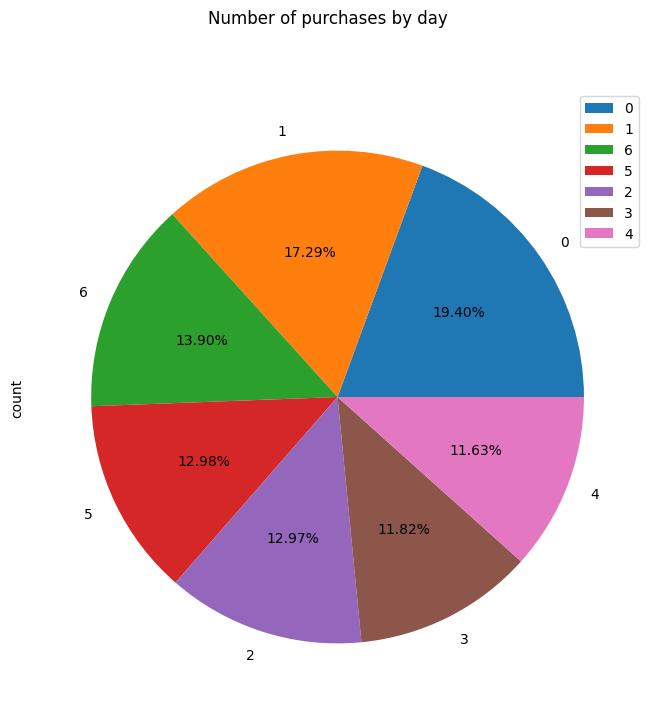

In [15]:
result.plot(
    kind = 'pie',
    autopct = '%1.2f%%',
    subplots = True,
    title = 'Number of purchases by day',
    figsize = (8, 8)
)

In [16]:
result1 = df.groupby('order_hour_of_day')['user_id'].agg(['count']).sort_values(by = 'count', ascending = False)
result1

,count
order_hour_of_day,
10,173306
11,170291
14,167831
15,167157
13,166376
12,163511
16,158247
9,150248
17,129383


In [17]:
def order_time(x):
    if x in [6,7,8,9,10,11,12]:
        return 'Morning'
    if x in [13,14,15,16,17]:
        return 'Afternoon'
    if x in [18,19,20,21,22]:
        return 'Evening'
    if x in [23,24,0,1,2,3,4,5]:
        return 'Night'
    return x

In [18]:
df['order_time_list']=df['order_hour_of_day'].apply(order_time)

In [19]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_list
0,2425083,49125,1,2,18,0,17,1,0,13,pantry,baking ingredients,Evening
1,2425083,49125,1,2,18,0,91,2,0,16,dairy eggs,soy lactosefree,Evening
2,2425083,49125,1,2,18,0,36,3,0,16,dairy eggs,butter,Evening
3,2425083,49125,1,2,18,0,83,4,0,4,produce,fresh vegetables,Evening
4,2425083,49125,1,2,18,0,83,5,0,4,produce,fresh vegetables,Evening


In [20]:
result2 = df.groupby('order_time_list')['user_id'].agg(['count']).sort_values(by = 'count',ascending = False)
result2

,count
order_time_list,
Morning,836546
Afternoon,788994
Evening,332661
Night,61300


<Axes: title={'center': 'Time of day when, the order was made'}, xlabel='order_time_list'>

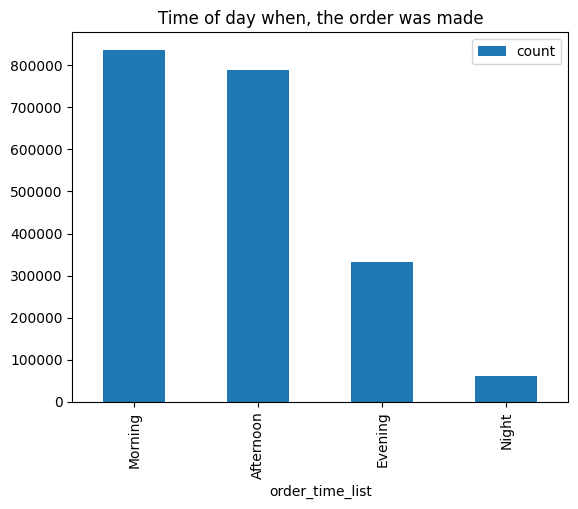

In [21]:
result2.plot(
    kind = 'bar',
    title = 'Time of day when, the order was made'
)

In [22]:
result3 = df.pivot_table(
    index = 'order_dow',
    columns = 'order_time_list',
    values = 'user_id',
    aggfunc = ['count']
)
result3

count                       
order_time_list Afternoon Evening Morning  Night
order_dow                                       
0                  162933   60195  157546  11157
1                  130205   51825  158356   8850
2                  100223   45497  108266   7926
3                   94072   41737   95722   7199
4                   89207   45359   92301   8017
5                  101113   42311  110126   8607
6                  111241   45737  114229   9544

<Axes: title={'center': 'The time when the order was made by day and time of day'}, xlabel='order_dow'>

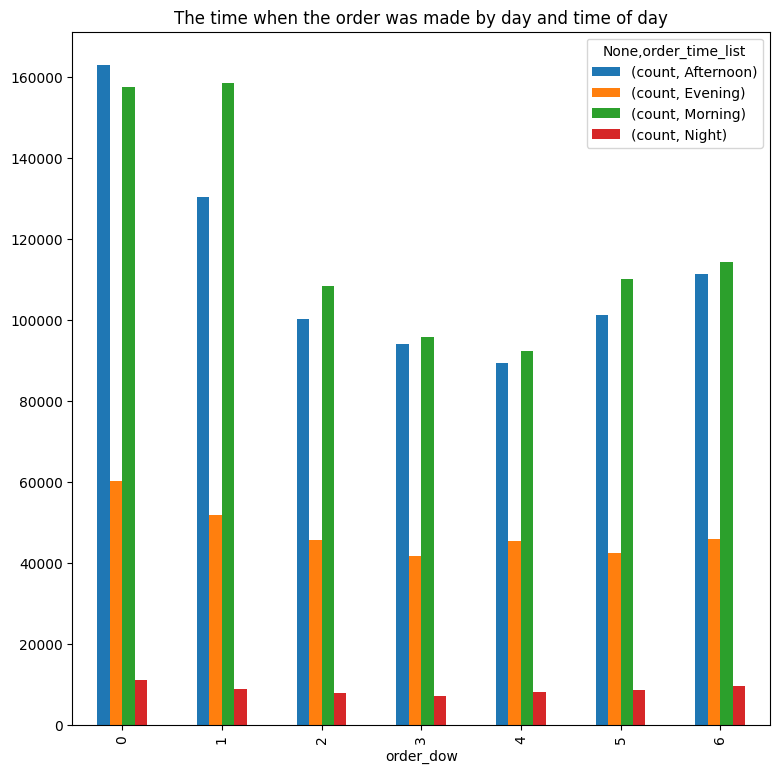

In [23]:
result3.plot(
    kind = 'bar',
    title = 'The time when the order was made by day and time of day',
    figsize = (9,9)
)

In [24]:
df.groupby('order_number')['user_id'].agg(['count'])

,count
order_number,
1,124342
2,122397
3,120627
4,118573
5,105482
...,...
96,1051
97,834
98,964


In [25]:
def order_number_group(x):
    if x <= 20 :
        x= '1-20 orders'
    elif x >20 and x <=40:
        x= '21-40 orders'
    elif x >40 and x <=60:
        x= '41-60 orders'
    elif x >60 and x <=80:
        x= '61-80 orders'
    else:
        x= '81-100 orders'
    return x

In [26]:
df['order_number_group']=df['order_number'].apply(order_number_group)
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_list,order_number_group
0,2425083,49125,1,2,18,0,17,1,0,13,pantry,baking ingredients,Evening,1-20 orders
1,2425083,49125,1,2,18,0,91,2,0,16,dairy eggs,soy lactosefree,Evening,1-20 orders
2,2425083,49125,1,2,18,0,36,3,0,16,dairy eggs,butter,Evening,1-20 orders
3,2425083,49125,1,2,18,0,83,4,0,4,produce,fresh vegetables,Evening,1-20 orders
4,2425083,49125,1,2,18,0,83,5,0,4,produce,fresh vegetables,Evening,1-20 orders


In [27]:
result4 = df.groupby('order_number_group')['user_id'].agg(['count']).sort_values(by = 'count', ascending = False)
result4

,count
order_number_group,
1-20 orders,1426484
21-40 orders,380514
41-60 orders,139421
61-80 orders,51612
81-100 orders,21470


array([<Axes: ylabel='count'>], dtype=object)

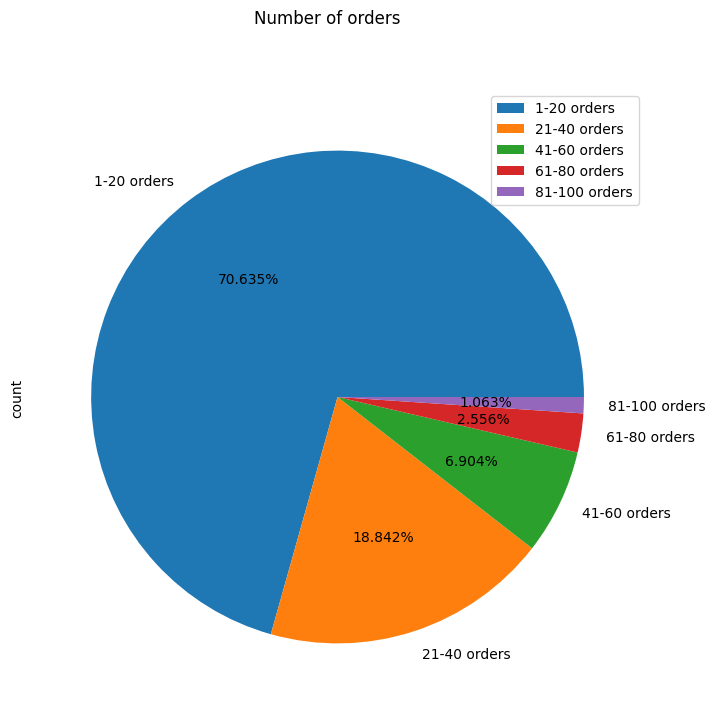

In [28]:
result4.plot(
    kind = 'pie',
    autopct = '%1.3f%%',
    subplots = True,
    title = 'Number of orders',
    figsize = (8, 8)
)

In [29]:
result4 = df.groupby('days_since_prior_order')['user_id'].agg('count')
result4

days_since_prior_order
0     152015
1      59200
2      88737
3     113263
4     126250
5     129089
6     155685
7     214126
8     118722
9      75120
10     62073
11     51476
12     48171
13     52204
14     63414
15     41531
16     28632
17     23921
18     22777
19     20140
20     23234
21     28359
22     19950
23     13779
24     12833
25     11832
26     11301
27     12804
28     16459
29     11590
30    210814
Name: user_id, dtype: int64

<Axes: title={'center': 'Days since prior order'}, xlabel='days_since_prior_order'>

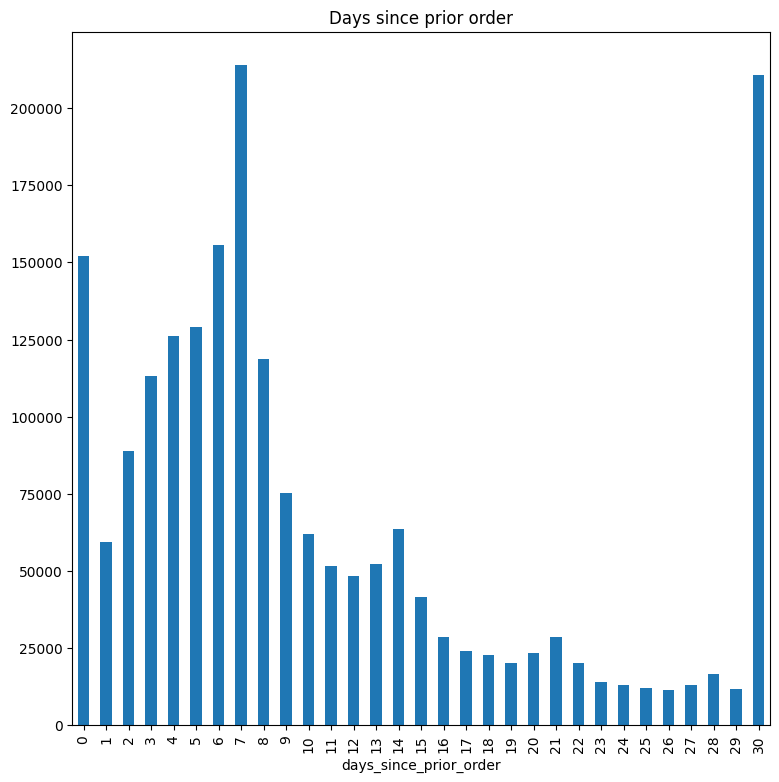

In [30]:
result4.plot(
    kind = 'bar',
    title = 'Days since prior order',
    figsize = (9,9)
)

In [31]:
result5 = df.groupby('product_id')['user_id'].agg(['count']).sort_values(by = 'count',ascending = False).head(15)
result5

,count
product_id,
24,226039
83,212611
123,109596
120,90751
21,61502
84,55150
115,52564
107,45306
91,39389


array([<Axes: ylabel='count'>], dtype=object)

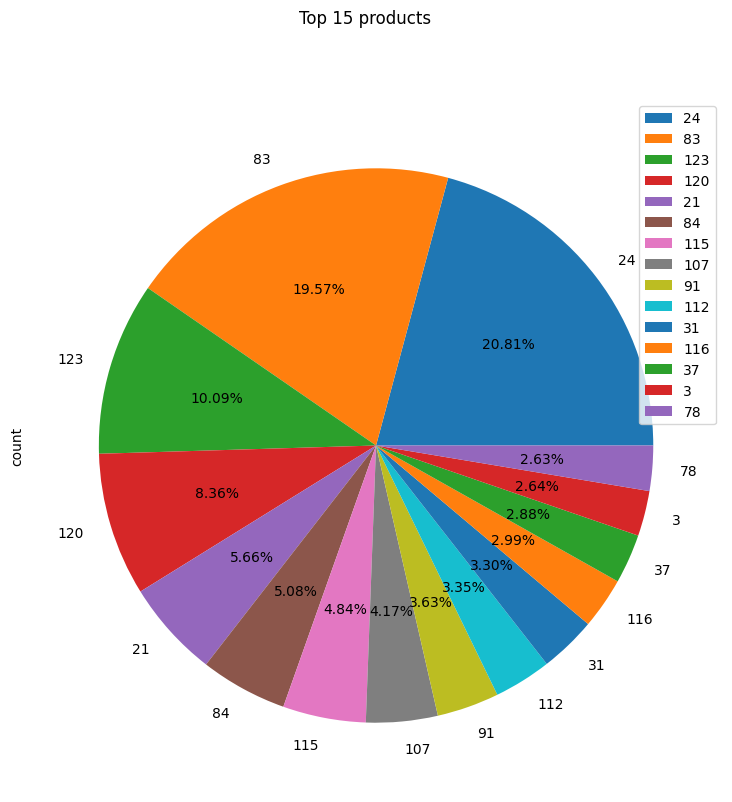

In [32]:
result5.plot(
    kind = 'pie',
    autopct = '%1.2f%%',
    subplots = True,
    title = 'Top 15 products',
    figsize = (9,9)
)

In [33]:
result6 = df.groupby('product_name')['user_id'].agg(['count']).sort_values(by = 'count',ascending = False).head(15)
result6

,count
product_name,
fresh fruits,226039
fresh vegetables,212611
packaged vegetables fruits,109596
yogurt,90751
packaged cheese,61502
milk,55150
water seltzer sparkling water,52564
chips pretzels,45306
soy lactosefree,39389


array([<Axes: ylabel='count'>], dtype=object)

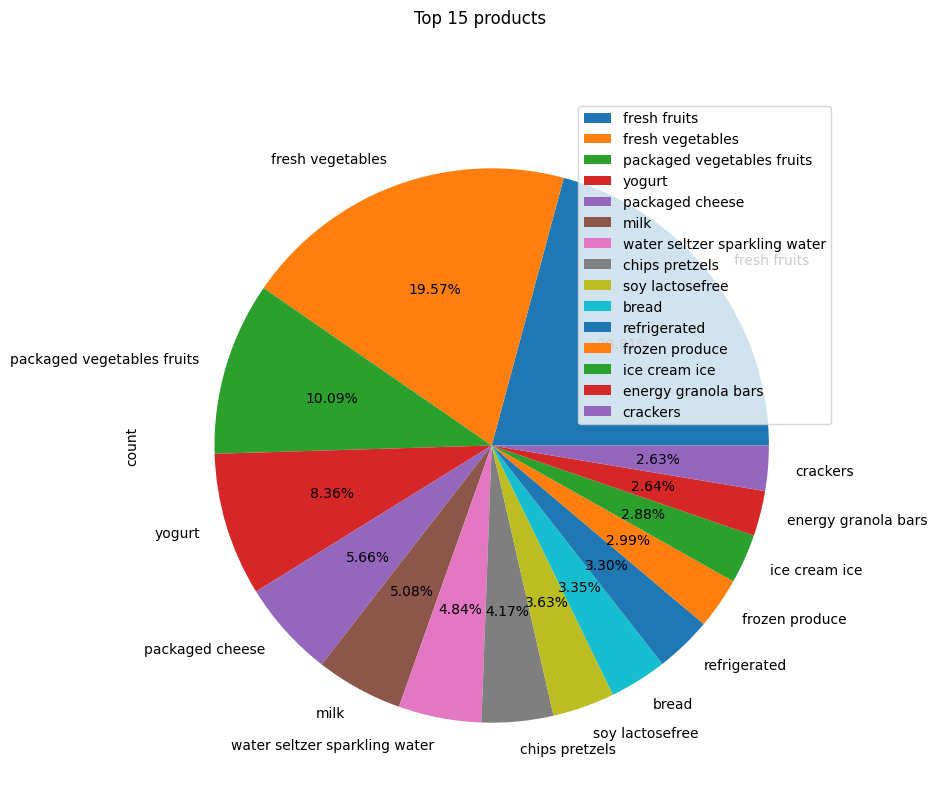

In [34]:
result6.plot(
    kind='pie',
    autopct='%1.2f%%',
    subplots=True,
    title='Top 15 products',
    figsize=(9,9)
)

In [35]:
atco_u = df.groupby('add_to_cart_order', as_index = False).agg({'user_id': 'count'}).sort_values(by='user_id',ascending=False)
atco_u

,add_to_cart_order,user_id
0,1,200000
1,2,190134
2,3,178480
3,4,165743
4,5,151983
...,...,...
132,133,1
133,134,1
134,135,1
135,136,1


<Axes: xlabel='user_id', ylabel='Count'>

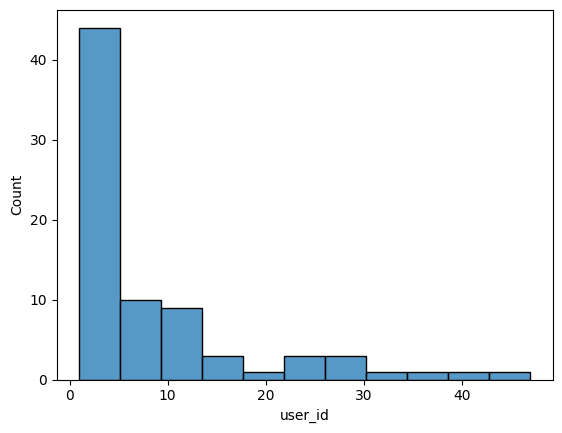

In [36]:
sns.histplot(
    atco_u.query('user_id<50').user_id, 
    kde = False
)

In [37]:
on_atco = df.groupby('order_number',as_index=False).agg({'add_to_cart_order': 'count'}).sort_values(by='add_to_cart_order', ascending = False)
on_atco

,order_number,add_to_cart_order
0,1,124342
1,2,122397
2,3,120627
3,4,118573
4,5,105482
...,...,...
96,97,834
90,91,826
94,95,741
98,99,716


<Axes: xlabel='add_to_cart_order', ylabel='Count'>

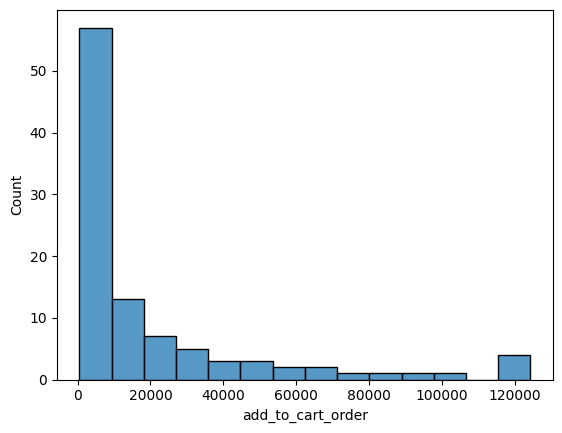

In [38]:
sns.histplot(
    on_atco.add_to_cart_order, 
    kde=False
)


In [39]:
df['reordered'].value_counts()


reordered
1    1190986
0     828515
Name: count, dtype: int64

In [40]:
result7 = df.groupby('department')['reordered'].agg(['count']).sort_values(by='count',ascending=False)
result7

,count
department,
produce,588996
dairy eggs,336915
snacks,180692
beverages,168126
frozen,139536
pantry,116262
bakery,72983
canned goods,66053
deli,65176


<Axes: title={'center': 'Reordereds'}, ylabel='department'>

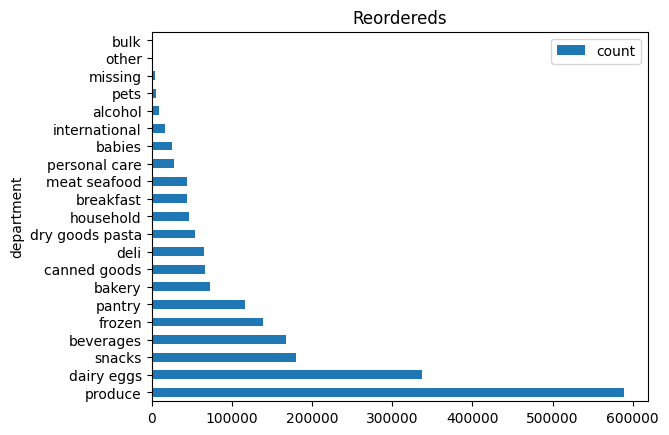

In [41]:
result7.plot(
    kind = 'barh', 
    title = 'Reordereds'
)

In [42]:
result8 = df.groupby('reordered')['user_id'].agg(['count'])
result8

,count
reordered,
0,828515
1,1190986


array([<Axes: ylabel='count'>], dtype=object)

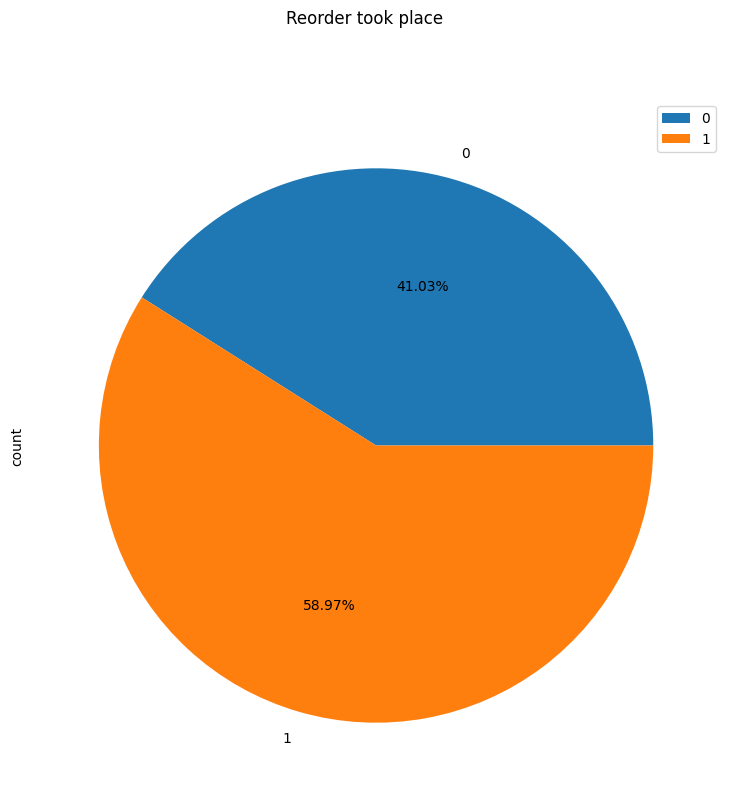

In [43]:
result8.plot(
    kind='pie',
    autopct='%1.2f%%',
    subplots=True,
    title='Reorder took place',
    figsize=(9,9)
)


In [44]:
result9 = df.groupby('product_id')['reordered'].agg(['count']).sort_values(by = 'count', ascending = False).head(10)
result9

,count
product_id,
24,226039
83,212611
123,109596
120,90751
21,61502
84,55150
115,52564
107,45306
91,39389


array([<Axes: ylabel='count'>], dtype=object)

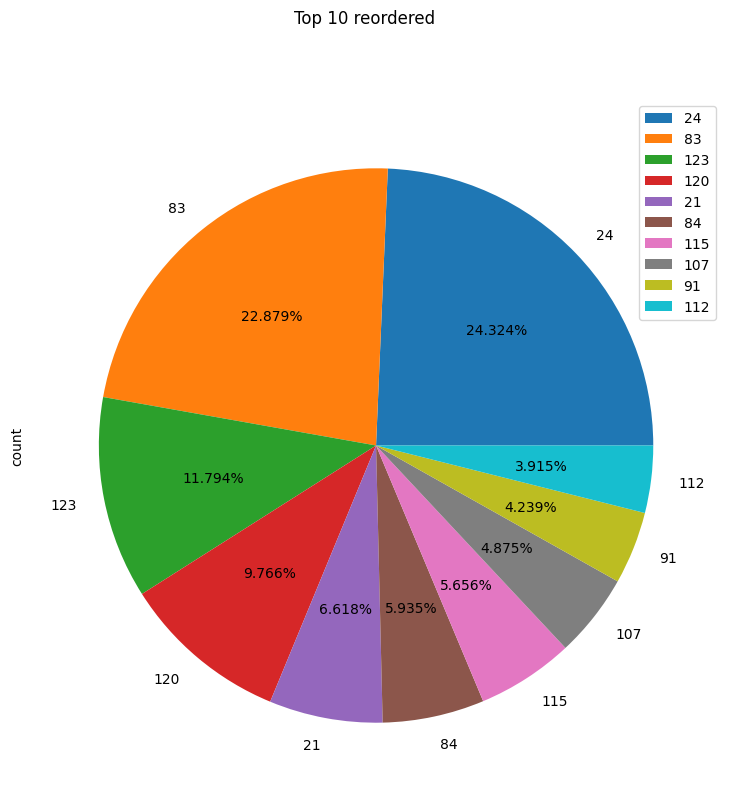

In [45]:
result9.plot(
    kind = 'pie',
    autopct = '%1.3f%%',
    subplots = True,
    title = 'Top 10 reordered',
    figsize = (9, 9)
)